Powtórz kroki przedstawione na omawianych wcześniej slajdach dla bazy danych place.csv

Sprawdź dane pod kątem jakościowym
Wyczyść bazę danych z niepotrzebnych wartości
Stwórz wykres rozrzutu dla lata nauki a wiek lub doświadczenie
a) ogólny
b) z podziałem na grupy np. stan cywilny
Oszacuj model regresji liniowej dla więcej niż 1 zmiennej
Przedstaw prostą regresji na wykresie
Podaj ostateczną postać modelu, opisz wnioski

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('place.csv', sep=';')
df.head()

ID  Placa  Zawod  Sektor  Czlonek zwiazku  Wyksztalcenie  Doswiadczenie  \
0  1.0   5.10    6.0     1.0              0.0            8.0           21.0   
1  2.0   4.95    6.0     1.0              0.0            9.0           42.0   
2  3.0   6.67    6.0     1.0              0.0           12.0            1.0   
3  4.0   4.00    6.0     0.0              0.0           12.0            4.0   
4  5.0   7.50    6.0     0.0              0.0           12.0           17.0   

   Wiek  Plec  Stan cywilny  Rasa  Poludnie  
0  35.0   1.0           1.0   2.0       0.0  
1  57.0   1.0           1.0   3.0       0.0  
2  19.0   0.0           0.0   3.0       0.0  
3  22.0   0.0           0.0   3.0       0.0  
4  35.0   0.0           1.0   3.0       0.0

In [3]:
#drop nans
df = df.dropna()

In [4]:
df = df[['Wiek', 'Wyksztalcenie', 'Doswiadczenie', 'Stan cywilny']]
df.head()

Wiek  Wyksztalcenie  Doswiadczenie  Stan cywilny
0  35.0            8.0           21.0           1.0
1  57.0            9.0           42.0           1.0
2  19.0           12.0            1.0           0.0
3  22.0           12.0            4.0           0.0
4  35.0           12.0           17.0           1.0

<AxesSubplot:xlabel='Wiek', ylabel='Wyksztalcenie'>

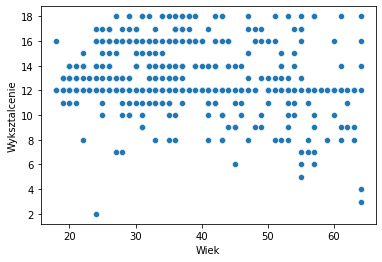

In [5]:
import seaborn as sns

sns.scatterplot(data=df, x='Wiek', y='Wyksztalcenie')

<AxesSubplot:xlabel='Wiek', ylabel='Wyksztalcenie'>

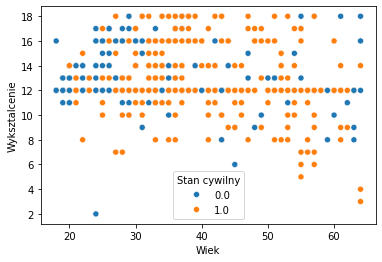

In [6]:
import seaborn as sns

sns.scatterplot(data=df, x='Wiek', y='Wyksztalcenie', hue='Stan cywilny')

Coefficients: 
 [ 0.99881785 -0.99664147]
Mean squared error: 0.00
Coefficient of determination: 1.00


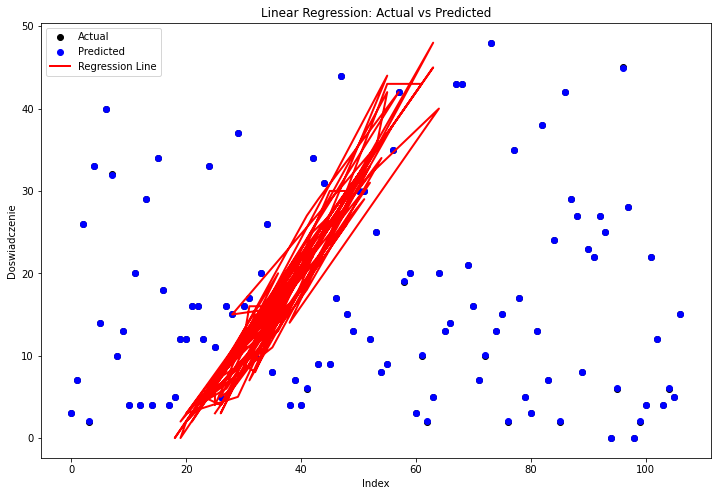

In [ ]:
# Linear Regression
X = df[['Wiek', 'Wyksztalcenie']]
Y = df['Doswiadczenie']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, Y_train)

Y_pred = regressor.predict(X_test)

print('Coefficients: \n', regressor.coef_)
print('Mean squared error: %.2f' % mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination: %.2f' % r2_score(Y_test, Y_pred))
